# Experimenting with CNN architectures
### Data reading

In [47]:
from utils.Models import vgg_net, generate_image_dataset, mlp
input_shape = (64, 64, 1)
train_data_path = 'Datasets/espe/lbp_histograms/train'
test_data_path = 'Datasets/espe/lbp_histograms/test'
validation_data_path = 'Datasets/espe/lbp_histograms/validation'
model = mlp(input_shape=input_shape)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Loading entire dataset

In [48]:
from utils.Models import complete_image_dataset_loading

rgb_train, rgb_test, rgb_validation = complete_image_dataset_loading(train_data_path, test_data_path, validation_data_path, (64, 64))

In [49]:
x_rgb_train, y_rgb_train = rgb_train[0], rgb_train[1]

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
model.fit(x_rgb_train, y_rgb_train,
          batch_size=64,
          epochs=300,
          validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 370 samples, validate on 93 samples
Epoch 1/300





370/370 [==============================] - 3s 7ms/step - loss: 3.7766 - acc: 0.0973 - val_loss: 11.7784 - val_acc: 0.2903
Epoch 2/300
370/370 [==============================] - 0s 586us/step - loss: 1.8993 - acc: 0.1027 - val_loss: 11.8144 - val_acc: 0.2903
Epoch 3/300
370/370 [==============================] - 0s 576us/step - loss: 1.8594 - acc: 0.1027 - val_loss: 11.8462 - val_acc: 0.2903
Epoch 4/300
370/370 [==============================] - 0s 576us/step - loss: 1.8278 - acc: 0.1054 - val_loss: 11.8761 - val_acc: 0.2903
Epoch 5/300
370/370 [==============================] - 0s 584us/step - loss: 1.8108 - acc: 0.1216 - val_loss: 11.9060 - val_acc: 0.2903
Epoch 6/300
370/370 [==============================] - 0s 582us/step - loss: 1.8050 - acc: 0.1595 - val_loss: 11.9332 - val_acc: 0.2903
Epoch 7/300
370/370 [==================

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
callbacks_list = [early_stop, reduce_lr]

In [4]:
model.fit_generator(
    train_gen,
    epochs=100,
    validation_data=validation_gen,
    steps_per_epoch=train_gen.samples//batch_size,
    callbacks=callbacks_list,
    validation_steps=250
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





28/28 [==============================] - 64s 2s/step - loss: 11.2877 - acc: 0.1205 - val_loss: 5.6058 - val_acc: 0.1465
Epoch 2/100
28/28 [==============================] - 46s 2s/step - loss: 4.5747 - acc: 0.1339 - val_loss: 3.8999 - val_acc: 0.1465
Epoch 3/100
28/28 [==============================] - 46s 2s/step - loss: 3.0330 - acc: 0.1484 - val_loss: 1.9544 - val_acc: 0.1465
Epoch 4/100
28/28 [==============================] - 46s 2s/step - loss: 2.0031 - acc: 0.1183 - val_loss: 1.9517 - val_acc: 0.1465
Epoch 5/100
28/28 [==============================] - 46s 2s/step - loss: 2.0016 - acc: 0.0786 - val_loss: 1.9461 - val_acc: 0.1465
Epoch 6/100
28/28 [==============================] - 46s 2s/step - loss: 1.9956 - acc: 0.0626 - val_loss: 1.9504 - val_acc: 0.1270
Epoch 7/100
28/28 [==============================] - 46s 2s/step - loss: 1.9850 - acc: 0.0751 - val_loss: 1.952

### Loading features dataset from .csv files

In [1]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

Using TensorFlow backend.


In [4]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/base/train', (256, 256), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/base/test', (256, 256), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/base/validation', (256, 256), True)

In [4]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])

### Loading histogram data

In [58]:
def load_csv_data(path):
    df = pd.DataFrame()
    for person in os.listdir(path):
        person_path = os.path.join(path, person)
        if person.endswith('.csv'):
            continue
        for instance in os.listdir(person_path):
            if instance.endswith('.csv') is False:
                continue
            instance_path = os.path.join(person_path, instance)
            extracted = pd.read_csv(instance_path, header=None)
            df = df.append(extracted)
    return df

def slice_labels(df):
    x = df.iloc[:, :17]
    y = df.iloc[:, 18]
    from keras.utils import to_categorical
    y = to_categorical(y)
    return x, y

In [22]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [70]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator()
train_generator = generator.flow_from_directory(directory='Datasets/espe/base/test', target_size=(32, 32), class_mode='categorical', batch_size=101)

Found 101 images belonging to 7 classes.


In [80]:
next(train_generator)

(array([[[[200., 213., 222.],
          [197., 210., 218.],
          [202., 215., 223.],
          ...,
          [189., 190., 184.],
          [168., 169., 164.],
          [108., 112.,  87.]],
 
         [[223., 231., 242.],
          [104., 116.,  96.],
          [ 93., 105.,  67.],
          ...,
          [201., 203., 215.],
          [117., 119., 108.],
          [178., 180., 192.]],
 
         [[102., 111.,  90.],
          [120., 126., 112.],
          [ 95., 101.,  65.],
          ...,
          [186., 198., 210.],
          [182., 194., 206.],
          [196., 208., 220.]],
 
         ...,
 
         [[219., 199., 149.],
          [225., 203., 143.],
          [218., 200., 138.],
          ...,
          [144., 133., 131.],
          [151., 140., 138.],
          [117., 106., 100.]],
 
         [[219., 198., 141.],
          [241., 220., 165.],
          [223., 203., 142.],
          ...,
          [130., 119., 117.],
          [140., 130., 121.],
          [105.,  94.,  88.

In [8]:
import os
from keras.utils import to_categorical
import cv2


def load_image_dataset(path, size):
    labels = []
    images = []
    for person in sorted(os.listdir(path)):
        person_path = os.path.join(path, person)
        for instance in os.listdir(person_path):
            if instance.endswith('.jpg') is False:
                continue
            instance_path = os.path.join(person_path, instance)
            image = cv2.imread(instance_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, size)
            label = to_categorical(person, num_classes=8)
            images.append(image)
            labels.append(label)
    return images, labels


In [1]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/base/train', (256, 256), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/base/test', (256, 256), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/base/validation', (256, 256), True)

Using TensorFlow backend.


In [2]:
input_shape = x_rgb_train.shape[1:]
input_shape

(256, 256, 1)

In [13]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model

lbp_hist_input = Input(shape=(32, 32, 3, ), name='texture_histogram')
x = Dense(36, activation='relu')(lbp_hist_input)
x = Dense(72, activation='relu')(x)
x = Model(inputs=lbp_hist_input, outputs=x)

features = Input(shape=(2,), name='features')
y = Dense(4, activation='relu')(features)
y = Dense(8, activation='relu')(y)
y = Model(inputs=features, outputs=y)
#
# combinedInput = concatenate([x.output, model.output])
# main_b = Dense(80, activation='relu')(combinedInput)
combinate = concatenate([x.output, y.output])

z = Dense(80, activation='relu')(combinate)
z = Dense(7, activation='softmax')(z)

model = Model(inputs=[x.input, y.input], outputs=z)

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 32, 32, 72), (None, 8)]

In [6]:
from keras import layers
from keras.models import Model

inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs, name='toy_resnet')

from keras.utils import to_categorical
from keras import datasets
from keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model.compile(optimizer=RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 35s 873us/step - loss: 1.8789 - acc: 0.2810 - val_loss: 1.5524 - val_acc: 0.4153


In [2]:
from utils.MaskRCNN import MaskRCNN
model = MaskRCNN()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


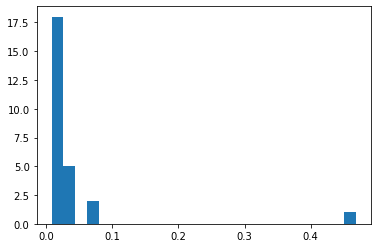

In [1]:
from utils.LocalBinaryPatterns import LocalBinaryPatterns
import cv2
import matplotlib.pyplot as plt
import pandas as pd

lbp = LocalBinaryPatterns(3)
image = cv2.imread('Datasets/espe/base/test/0/001_9 16.jpg')

lbp_img = lbp.lbp(image)
hist = lbp.describe(image=image)

from collections import Counter


plt.hist(hist, bins=len(hist))
plt.savefig('1.png')
plt.show()

# cropped_frame = cv2.cvtColor(lbp_img.astype('uint8') * 255, cv2.COLOR_GRAY2RGB)
#
# # cv2.imshow("LBP", cropped_frame)
#
# lbp_img = lbp_img.astype('uint8')
# cv2.imshow("LBP 2", lbp_img)
#
# cv2.waitKey(0)

# cv2.imwrite('save.jpg', lbp_img)

from PIL import Image
# pd.DataFrame()

# Image.fromarray(lbp_img).save('out_2.jpg')

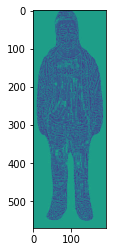

In [45]:
# out_2 = Image.open('out_2.jpg')
out_2 = cv2.imread('Datasets/espe/lbp_histograms/train/0/person_0_1.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(out_2)
plt.show()

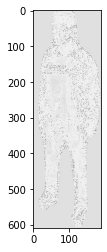

(609, 189, 3)

In [43]:
import pandas as pd
disk_load_lbp = cv2.imread('Datasets/espe/lbp_histograms/test/0/person_0_1.jpg', cv2.COLOR_BGR2GRAY)
# disk_load_lbp = cv2.cvtColor(disk_load_lbp, cv2.COLOR_BGR2GRAY)
plt.imshow(disk_load_lbp)
plt.show()
disk_load_lbp.shape

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


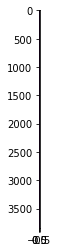

In [7]:
import cv2
from utils.MaskRCNN import MaskRCNN
import matplotlib.pyplot as plt

model = MaskRCNN()



In [34]:
image = cv2.imread("Datasets/Propio/Video/pasillo/cam_1/pasillo_001/pasillo_001 0044.jpg")
copied_image = image.copy()
r, _ = model.segment(image)

In [35]:
mask = r['masks'][:, :, 0].astype('uint8')
x1, y1 = r["rois"][0][0], r["rois"][0][1]
x2, y2 = r["rois"][0][2], r["rois"][0][3]

In [36]:
from utils.ReID import crop_frame, apply_mask
masked_image = apply_mask(copied_image, mask)
cropped = crop_frame(x1, x2, y1, y2, masked_image)

In [27]:
cv2.imshow("", cropped)
cv2.waitKey(0)

-1

In [39]:
import PIL
from PIL import Image
i = Image.fromarray(cropped)
cv2.imwrite('masked2.jpg', mask * 255)

True